In [1]:
import numpy as n
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
train=pd.read_csv('titanic_train.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


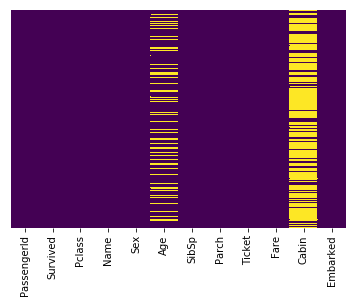

In [3]:
#Use heatmap to visualize the null value
sns.heatmap(train.isnull(),yticklabels=False, cbar=False,cmap='viridis')
plt.show()

In [4]:
sns.set_style('whitegrid')

### Use seaborn library to gain insights and relationships among columns

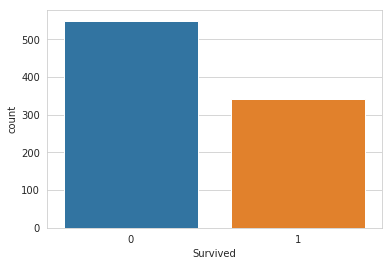

In [5]:
sns.countplot(x='Survived',data=train)
plt.show()

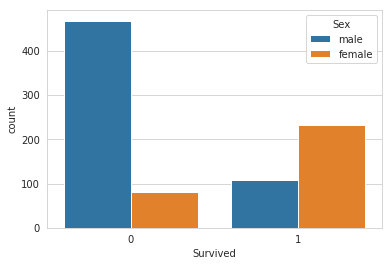

In [6]:
sns.countplot(x='Survived',data=train,hue='Sex')
plt.show()

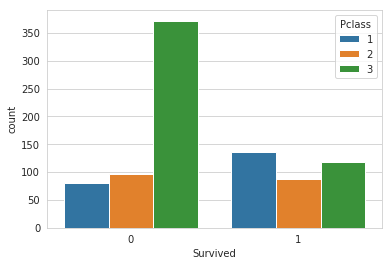

In [7]:
sns.countplot(x='Survived',hue='Pclass',data=train)
plt.show()

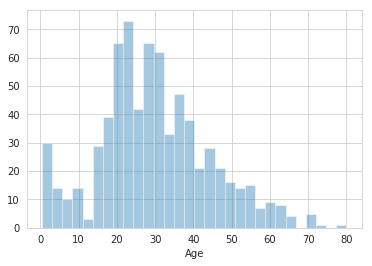

In [8]:
sns.distplot(train['Age'].dropna(),kde=False,bins=30)
plt.show()

In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


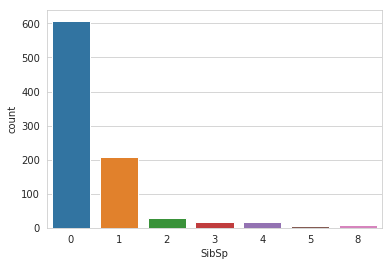

In [10]:
sns.countplot(x='SibSp',data=train)
plt.show()

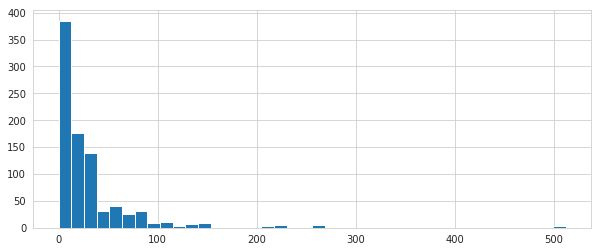

In [11]:
train['Fare'].hist(bins=40,figsize=(10,4))
plt.show()

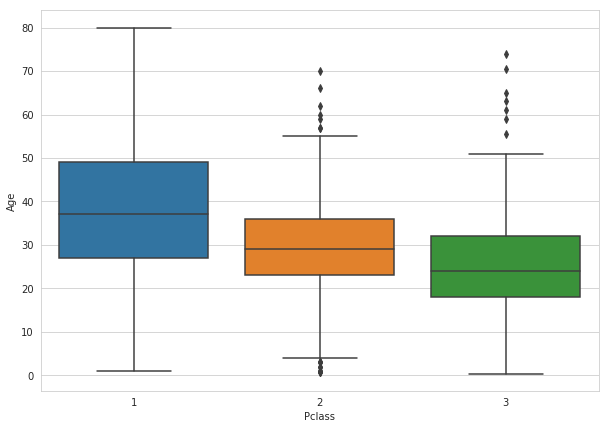

In [12]:
plt.figure(figsize=(10,7))
sns.boxplot(x='Pclass',y='Age',data=train)
plt.show()

In [13]:
print(train[train['Pclass']==1]['Age'].mean())
print(train[train['Pclass']==2]['Age'].mean())
print(train[train['Pclass']==3]['Age'].mean())

38.233440860215055
29.87763005780347
25.14061971830986


In [16]:
#Replace nul values in Age column with the average age values according to the Pclass
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        if Pclass==1:
            return 38
        elif Pclass==2:
            return 29
        else:
            return 25
    else:
        return Age

In [17]:
train['Age']=train[['Age','Pclass']].apply(impute_age,axis=1)

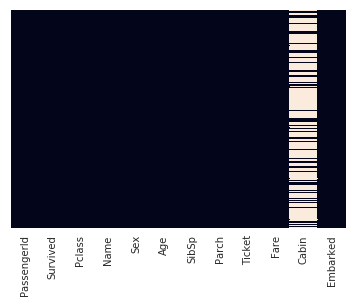

In [18]:
#Use heatmap to check null values in column 'Age' again
sns.heatmap(train.isnull(),yticklabels=False,cbar=False)
plt.show()

In [19]:
train.drop('Cabin',axis=1,inplace=True)

In [20]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [21]:
train.dropna(inplace=True)

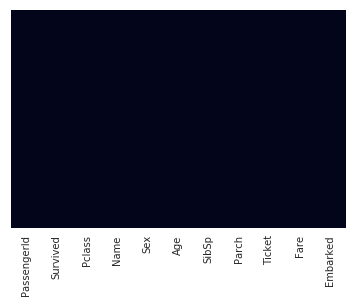

In [22]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False)
plt.show()

In [23]:
#Convert Categorical Variables
sex = pd.get_dummies(train['Sex'],drop_first=True)
embark = pd.get_dummies(train['Embarked'],drop_first=True)

In [24]:
embark.head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [25]:
train=pd.concat([train,sex,embark],axis=1)
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,0,1


In [26]:
#Drop some uneccessary columns here
train.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


In [27]:
train.drop('PassengerId',axis=1,inplace=True)
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


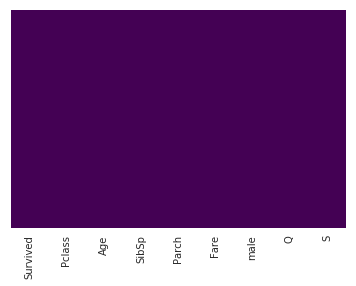

In [29]:
#Double check the null values
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.show()

### Perform Logistic Regression

In [30]:
X=train.drop('Survived',axis=1)
y=train['Survived']

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.3,random_state=101)

In [33]:
from sklearn.linear_model import LogisticRegression

In [34]:
log=LogisticRegression()

In [35]:
log.fit(X_train, y_train)

/home/jupyterlab/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [36]:
predictions=log.predict(X_test)

In [37]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [38]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.80      0.91      0.85       163
           1       0.82      0.65      0.73       104

   micro avg       0.81      0.81      0.81       267
   macro avg       0.81      0.78      0.79       267
weighted avg       0.81      0.81      0.80       267



In [42]:
cm=confusion_matrix(y_test,predictions)
cm

array([[148,  15],
       [ 36,  68]])

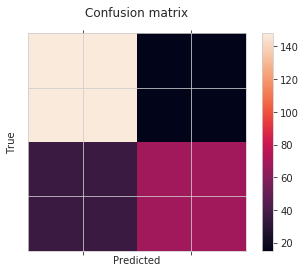

In [45]:
#Visualize the confusion matrix
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix')
fig.colorbar(cax)
ax.set_xticklabels(['ss'])
ax.set_yticklabels([''])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()